# Hi!

I'm **Rizky Anshari**

Notebook ini adalah bentuk evaluasi saya pada pembelajaran machine learning untuk supervised learning.

### The Data
'bigquery-public-data.ml_datasets.credit_card_default'

### The Objective
Memprediksi default_payment_next_month dari dataset credit_card_default pada Big Query, menggunakan model-model classification.
- pada pengamatan ini akan dibuat model classification terbaik untuk menentukan default payment next mount.

In [5]:
#### Query
'''
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

from `bigquery-public-data.ml_datasets.credit_card_default`

limit 2965;
'''
# angka 2965 dipilih karena jumlah data maksimalnya
;

''

![Image](https://www.canstar.com.au/wp-content/uploads/2017/09/Credit-card-default-1.jpg)

# A. Library
*Library - library yang digunakan :*

In [6]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Data Exploring
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
# Data Processing
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
# Data Modelling
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from xgboost import XGBClassifier # Extreme Gradient Boosting
# Data Evaluation
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# B. Data Loading
*pada data loading akan dilakukan pemuatan data dan mengamatan sederhana*

In [8]:
# load dataset
data = pd.read_csv('/content/h8dsft_P1M1_rizky_anshari.csv')

# mengganti option agar seluruh kolom dapat ditampilkan
pd.set_option('display.max_columns', None)

In [9]:
# menampilkan head data
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [10]:
# menapilkan 5 baris data terakhir
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 1. Data information

In [11]:
# menampilkan info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Dari basic info ini dapat diketahui datafrane terbentuk dari:
- Jumlah baris data 2965
- Jumlah kolom 24
- 18 kolom dengan tipe **float**
- 6 kolom dengan tipe **integer**

Jika dilihat dari basic info ini sepertinya tidak ada missing value pada dataframe, tetapi type datanya harus kita perbaiki.

In [12]:
# describe data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


- tidak ditemukan anomali pada data

In [13]:
# mendefinisikan value pada masing2 kolom
print("All columns Unique values count")
for col in data:
    print(col, len(data[col].unique()), sep=': ')

All columns Unique values count
limit_balance: 59
sex: 2
education_level: 7
marital_status: 4
age: 49
pay_0: 11
pay_2: 10
pay_3: 9
pay_4: 10
pay_5: 9
pay_6: 8
bill_amt_1: 2643
bill_amt_2: 2592
bill_amt_3: 2549
bill_amt_4: 2504
bill_amt_5: 2482
bill_amt_6: 2461
pay_amt_1: 1415
pay_amt_2: 1372
pay_amt_3: 1302
pay_amt_4: 1214
pay_amt_5: 1194
pay_amt_6: 1189
default_payment_next_month: 2


- ditemukan bahwa beberapa datanya sudah diencoding, seperti kolom sex, education, marital status dan beberapa datanya sudah dikategorikan seperti pada kolom-kolom pay.

## 2. Data Cleaning
*pada bagian ini akan dilakukan pembersihan data*

### 2.1 Missing Value
*akan dilakukan pengecekan terhadap missing value*

In [14]:
# menjumlahkan missing valaue setiap kolom
data.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

tidak terdapat missing value pada data

### 2.2 Data duplicated
*pada bagian ini akan dilakukan pengecekan terhadap data duplikat.*

In [15]:
# checking duplicated data
data.duplicated().sum()

1

ditemukan ada 1 data duplicated

In [16]:
# drop data duplicated
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

data duplicated telah didrop

In [17]:
# shape dataset
data.shape

(2964, 24)

# C.Exploratory Data Analysis
*exploring data*

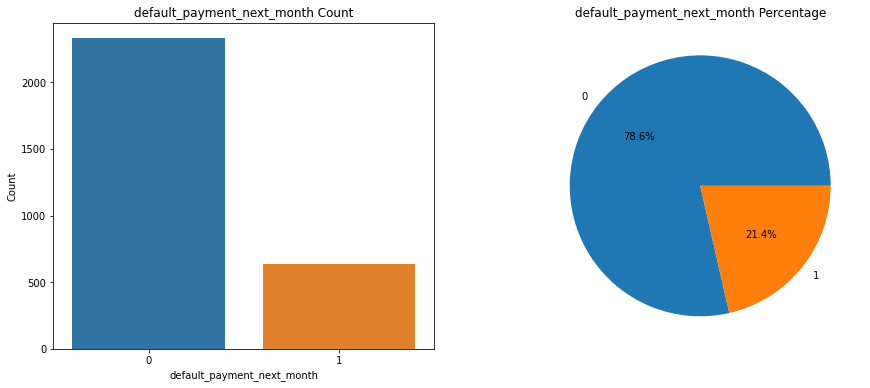

In [18]:
# membuat grafik countplot untuk kolom target

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='default_payment_next_month', data=data)
plt.title('default_payment_next_month Count')
plt.xlabel('default_payment_next_month')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data.default_payment_next_month.value_counts(), labels=data.default_payment_next_month.value_counts().index, autopct='%1.1f%%')
plt.title('default_payment_next_month Percentage')
plt.show()

secara sederhana dapat langsung terlihat jika default payment next mount untuk nasabah yang tidak default atau 0 adalah 78.6% dan yang default atau 1 yaitu 21.4%. ini artinya ada seperlima nasabah yang card creditnya telah di default

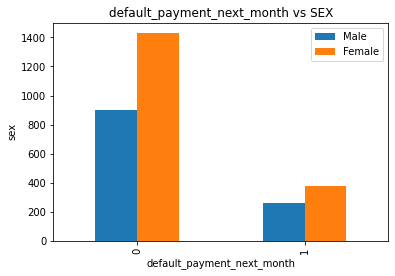

In [19]:
pd.crosstab(data['default_payment_next_month'],data['sex']).plot(kind='bar')
plt.title('default_payment_next_month vs SEX')
plt.xlabel('default_payment_next_month')
plt.ylabel('sex')
plt.legend(['Male', 'Female'])
plt.show()

nasabah default didominasi oleh perempuan, tetapi dominasi ini memang dikarenakan major datanya lebih banyak perempuan.

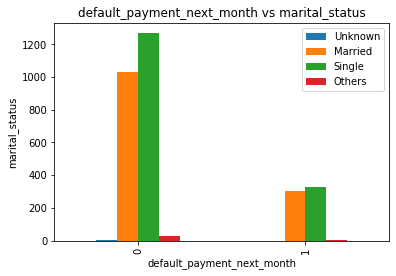

In [20]:
pd.crosstab(data['default_payment_next_month'],data['marital_status']).plot(kind='bar')
plt.title('default_payment_next_month vs marital_status')
plt.xlabel('default_payment_next_month')
plt.ylabel('marital_status')
plt.legend(['Unknown', 'Married', 'Single', 'Others'])
plt.show()

untuk status menikah, deketahui bahwa yang banyak default adalah dengan status single, dan maried, untuk nilai yang lain kurang jelas mungkin divorce dsb jadi tidak dapat dibandingkan.

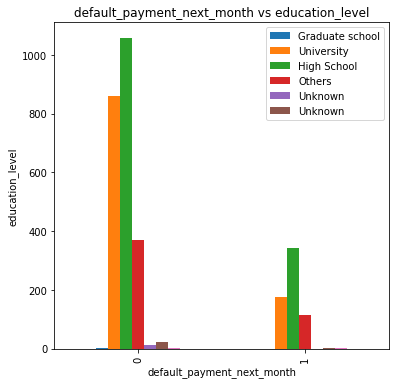

In [21]:
pd.crosstab(data['default_payment_next_month'],data['education_level']).plot(kind='bar', figsize=(6,6))
plt.title('default_payment_next_month vs education_level')
plt.xlabel('default_payment_next_month')
plt.ylabel('education_level')
plt.legend(['Graduate school','University','High School', 'Others', 'Unknown', 'Unknown'])
plt.show()

secara grafik hampir sama dengan grafik sebelumnya yaitu nilai default mengikuti major datanya, begitu pula untuk education level, disini ternyata default didominasi pendidikan HighSchool, dan Universitas. ini dapat menjadi pertimbangan untuk lebih memilah nasabah baru jika pendidikannya HighSchool.

# D. Data Preprocessing
*bagian ini berisi penyiapan data untuk modelling*

#### 1. Split Data
*akan dilakukan pemisahan data inference, data train dan data test.*

In [22]:
# Mengambil data inference
df_inf = data.sample(20, random_state=41)

# Memisahkan data inf dari dataset
df_train_test = data.drop(df_inf.index)

# reset index untuk kedua datanya
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

In [23]:
# train_test_split
# memisahkan data train dan test
train, test = train_test_split(df_train_test, test_size=0.3, random_state=21)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (2060, 24)
Test size:  (884, 24)


- pengambilan data inference sejumlah 20
- data inference didrop untuk dipisahkan dari data
- kemudian dilakukan pemisahan data train 70 persen dan data test 30 persen

### 2. Corelation dengan Heatmap
*mencari korelasi/hubungan pada tiap kolom/feature dengan target, untuk menentukan feature yang digunakan*

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


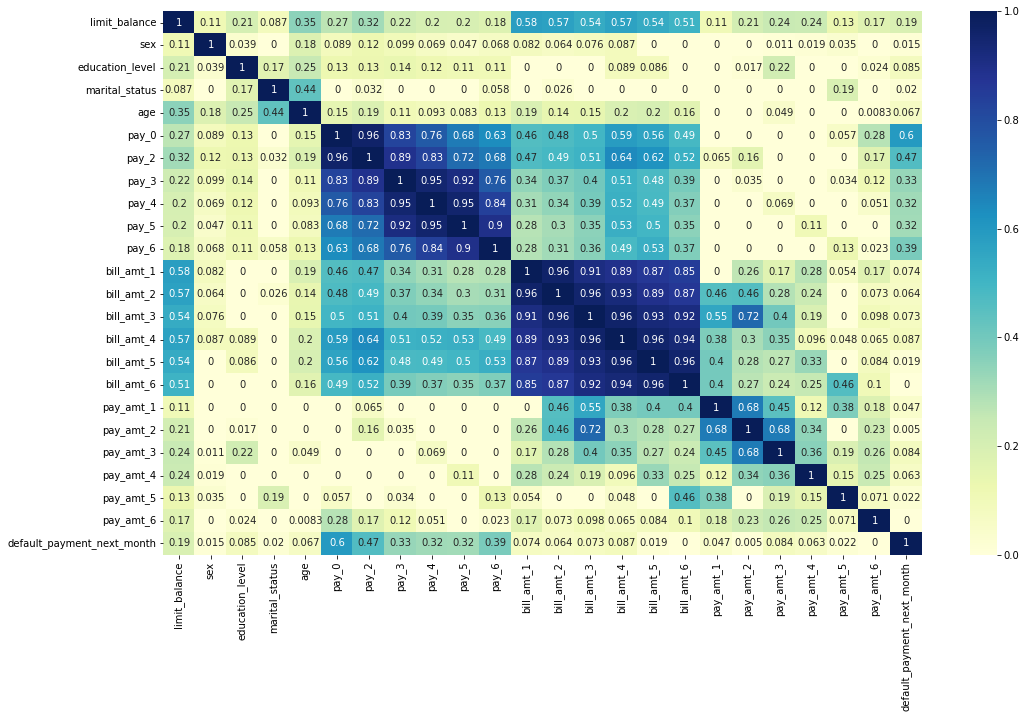

In [24]:
# plot nilai korelasi antar kolom data
plt.figure(figsize=(17,10))
sns.heatmap(data.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

pada fungsi korelation hal-hal berpengaruh signifikan dengan default atau tidaknya seorang nasabah yaitu dari segi bagaimana dia melakukan pembayaran dalam 6 kategori kolom pada data yaitu pay_0, pay_2, ... pay,6 dan juga berkorelasi dengan limit balance nya
- untuk mengetahui nasabah manakah yang akan default pada data yang akan datang kita akan lakukan modelling dan predict.

### 3. Feature Selection
*seleksi feature yang digunakan*

In [25]:
# seleksi feature yang digunakan berdasarkan korelasinya
df_train = df_train_test[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
df_test = df_train_test[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
df_train

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,50000.0,0.0,0.0,0.0,0.0,0,0,0
1,110000.0,0.0,0.0,0.0,0.0,0,0,0
2,270000.0,0.0,0.0,0.0,2.0,0,0,0
3,130000.0,0.0,0.0,0.0,0.0,0,0,0
4,50000.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...
2939,210000.0,-1.0,-1.0,-1.0,-1.0,-2,-1,0
2940,280000.0,2.0,-1.0,-1.0,-1.0,-2,-1,0
2941,80000.0,1.0,-1.0,-1.0,-1.0,-2,-2,0
2942,200000.0,1.0,-1.0,-1.0,-2.0,-2,-1,1


### 4. Checking outlier

In [26]:
# membuat fungsi untuk menampilkan histplot dan boxplot
def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

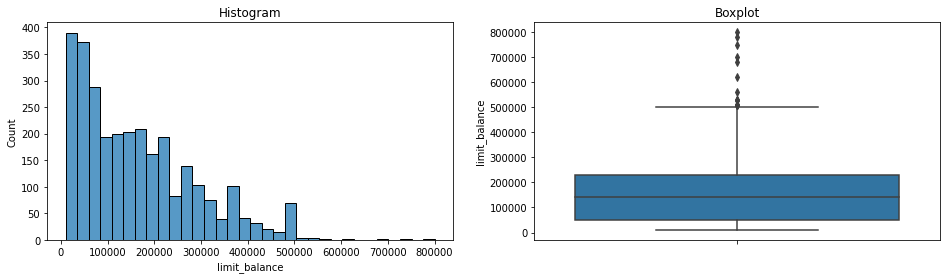


Nilai Skewness:  0.9979239127798435


In [27]:
# histogram dan boxplot kolom limit_balance

diagnostic_plots(df_train, 'limit_balance')
print('\nNilai Skewness: ', df_train['limit_balance'].skew())

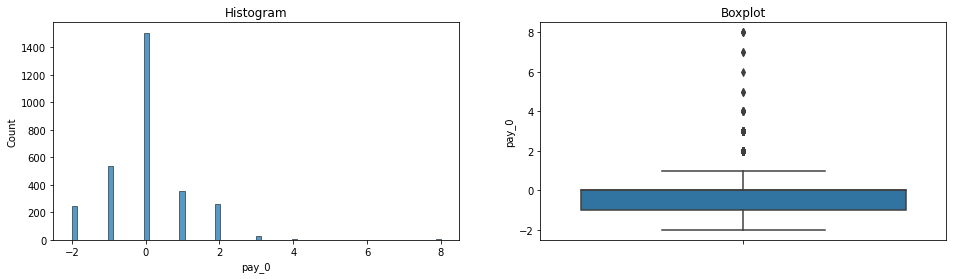


Nilai Skewness:  0.931552416914333


In [28]:
# histogram dan boxplot kolom pay_1

diagnostic_plots(df_train, 'pay_0')
print('\nNilai Skewness: ', df_train['pay_0'].skew())

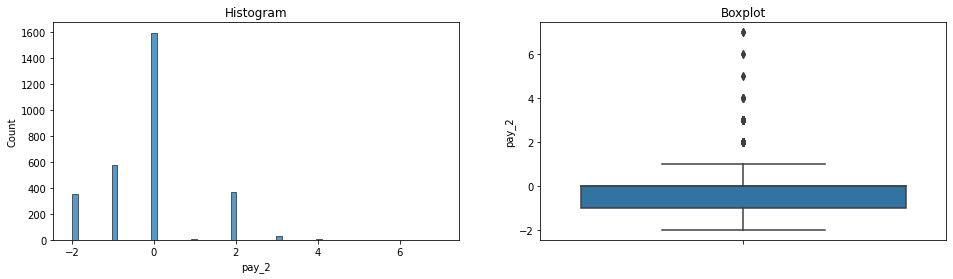


Nilai Skewness:  0.8647357717662181


In [29]:
# histogram dan boxplot kolom pay_2

diagnostic_plots(df_train, 'pay_2')
print('\nNilai Skewness: ', df_train['pay_2'].skew())

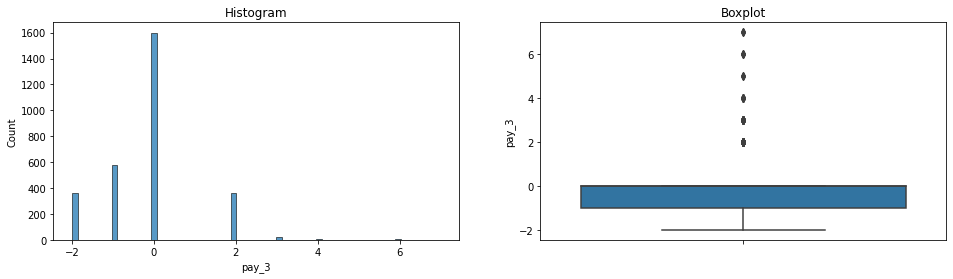


Nilai Skewness:  0.9384238040957703


In [30]:
# histogram dan boxplot kolom pay_3

diagnostic_plots(df_train, 'pay_3')
print('\nNilai Skewness: ', df_train['pay_3'].skew())

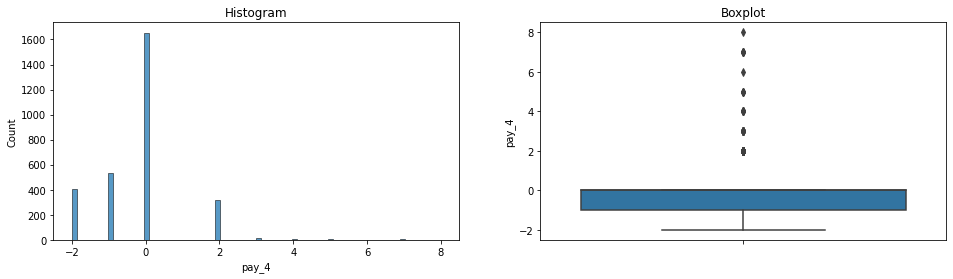


Nilai Skewness:  1.105653421899218


In [31]:
# histogram dan boxplot kolom pay_4

diagnostic_plots(df_train, 'pay_4')
print('\nNilai Skewness: ', df_train['pay_4'].skew())

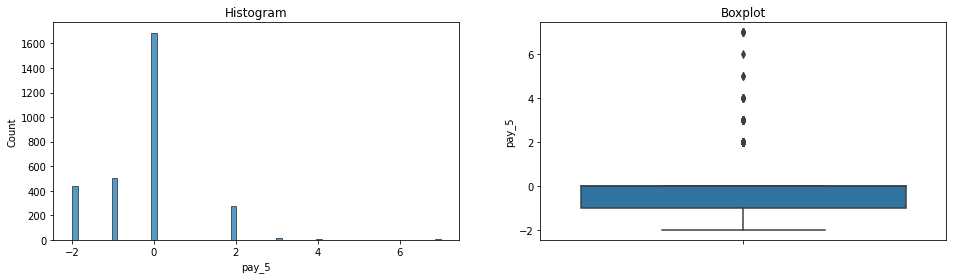


Nilai Skewness:  1.0625558678311755


In [32]:
# histogram dan boxplot kolom pay_5

diagnostic_plots(df_train, 'pay_5')
print('\nNilai Skewness: ', df_train['pay_5'].skew())

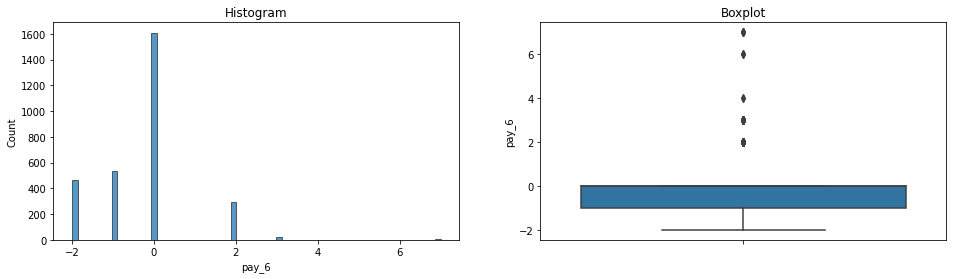


Nilai Skewness:  0.9818583832035332


In [33]:
# histogram dan boxplot kolom pay_6

diagnostic_plots(df_train, 'pay_6')
print('\nNilai Skewness: ', df_train['pay_6'].skew())

data target cenderung berdistribusi skew pada kisaran 0.9,

karena distribusi datanya tidak begitu extreme handling outlier tidak dilakukan. pertimbangan selanjutnya yaitu karena data telah diencode/dikategorikan sebelumnya. untuk menghindari model belajar terlalu sederhana dan tidak sesuai dengan reel data kita akan langsung menggunakan data untuk diolah.

### 5. Split Feature dan Target

In [34]:
# melakukan pemisahan antara data feature dan target predict
X_train = df_train.drop(columns='default_payment_next_month')
y_train = df_train['default_payment_next_month']

X_test = df_test.drop(columns='default_payment_next_month')
y_test = df_test['default_payment_next_month']

### memperbaiki type data
sebagaimana keterangan pada kolom data loading kita akan memperbaiki type data pada kolom2 ini

In [35]:
# melihat info data pada X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   limit_balance  2944 non-null   float64
 1   pay_0          2944 non-null   float64
 2   pay_2          2944 non-null   float64
 3   pay_3          2944 non-null   float64
 4   pay_4          2944 non-null   float64
 5   pay_5          2944 non-null   int64  
 6   pay_6          2944 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 161.1 KB


In [36]:
# memperbaiki type data
X_train = X_train.astype({'limit_balance':'int64'})
X_train = X_train.astype({'pay_0':'object'})
X_train = X_train.astype({'pay_2':'object'})
X_train = X_train.astype({'pay_3':'object'})
X_train = X_train.astype({'pay_4':'object'})
X_train = X_train.astype({'pay_5':'object'})
X_train = X_train.astype({'pay_6':'object'})

X_test = X_test.astype({'limit_balance':'int64'})
X_test = X_test.astype({'pay_0':'object'})
X_test = X_test.astype({'pay_2':'object'})
X_test = X_test.astype({'pay_3':'object'})
X_test = X_test.astype({'pay_4':'object'})
X_test = X_test.astype({'pay_5':'object'})
X_test = X_test.astype({'pay_6':'object'})

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   limit_balance  2944 non-null   int64 
 1   pay_0          2944 non-null   object
 2   pay_2          2944 non-null   object
 3   pay_3          2944 non-null   object
 4   pay_4          2944 non-null   object
 5   pay_5          2944 non-null   object
 6   pay_6          2944 non-null   object
dtypes: int64(1), object(6)
memory usage: 161.1+ KB


data type telah diperbaiki

### 6. Handling imbalance data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Imbalanced')

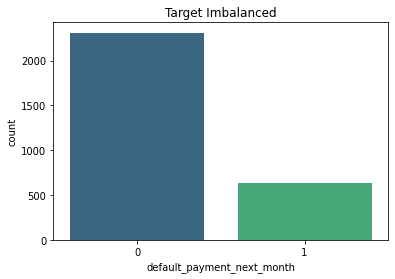

In [38]:
# menampilkan barplot data target
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Imbalanced')

In [39]:
X_train

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,50000,0.0,0.0,0.0,0.0,0,0
1,110000,0.0,0.0,0.0,0.0,0,0
2,270000,0.0,0.0,0.0,2.0,0,0
3,130000,0.0,0.0,0.0,0.0,0,0
4,50000,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
2939,210000,-1.0,-1.0,-1.0,-1.0,-2,-1
2940,280000,2.0,-1.0,-1.0,-1.0,-2,-1
2941,80000,1.0,-1.0,-1.0,-1.0,-2,-2
2942,200000,1.0,-1.0,-1.0,-2.0,-2,-1


- data train tidak balance, untuk meningkatkan akurasi belajar model akan dilakukan balancing data ini

In [40]:
# handling data imbalance pada data train
smote = SMOTENC([1,2,3,4,5,6], sampling_strategy='minority')
X_train ,y_train = smote.fit_resample(X_train ,y_train)

print(X_train.shape ,y_train.shape)

(4622, 7) (4622,)


smote adalah metode dalam handling data imbalance, secara prinsip sederhana data terkecil nya akan dinaikan mengikuti data yang besar. data hal ini value 1 akan dinaikan sejumlah value 0
- SMOTENC digunakan karena data memiliki categorical kolom

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Balanced')

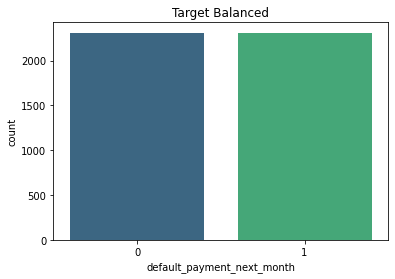

In [41]:
# menampilkan barplot untuk melihat hasil perubahan
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Balanced')

In [42]:
X_train

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,50000,0.0,0.0,0.0,0.0,0,0
1,110000,0.0,0.0,0.0,0.0,0,0
2,270000,0.0,0.0,0.0,2.0,0,0
3,130000,0.0,0.0,0.0,0.0,0,0
4,50000,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
4617,70000,0.0,0.0,0.0,0.0,0,0
4618,391770,1.0,-2.0,-2.0,-2.0,-2,-2
4619,20000,3.0,2.0,2.0,2.0,2,2
4620,25601,2.0,0.0,0.0,0.0,0,0


- X_train data telah balance

- tidak dilakukan balancing data pada X_test dengan tujuan agar model belajar secara nyata pada data test, karena pada kenyataannya data target hampir tidak pernah balance

### 7. Split kolom numerikal dan kategorikal

In [43]:
# fungsi untuk memisahkan kolom numerik dengan kolom kategori
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Kolom numerikal:', num_columns)
print('Kolom kategorikal:', cat_columns)

Kolom numerikal: ['limit_balance']
Kolom kategorikal: ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [44]:
# memisahkan data train dan test berdasarkan tipe data
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

### 8. Feature Scalling

In [45]:
# scaling data X_train, X_test pada kolom num menggunakan StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-0.82450445],
       [-0.32345986],
       [ 1.01265904],
       ...,
       [-1.07502674],
       [-1.02825423],
       [ 1.63595851]])

In [46]:
# menggabungkan kolom yang discalling dan kolom categorinya
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[-0.8245044495080173, 0.0, 0.0, ..., 0.0, 0, 0],
       [-0.3234598615917763, 0.0, 0.0, ..., 0.0, 0, 0],
       [1.0126590395181996, 0.0, 0.0, ..., 2.0, 0, 0],
       ...,
       [-1.0750267434661378, 3.0, 2.0, ..., 2.0, 2, 2],
       [-1.0282542311841567, 2.0, 0.0, ..., 0.0, 0, 0],
       [1.6359585068860034, 0.0, 0.0, ..., 0.0, 0, 0]], dtype=object)

In [47]:
# membuat dataframe untuk X_train_final

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6
0,-0.824504,0.0,0.0,0.0,0.0,0,0
1,-0.32346,0.0,0.0,0.0,0.0,0,0
2,1.012659,0.0,0.0,0.0,2.0,0,0
3,-0.156445,0.0,0.0,0.0,0.0,0,0
4,-0.824504,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
4617,-0.65749,0.0,0.0,0.0,0.0,0,0
4618,2.029529,1.0,-2.0,-2.0,-2.0,-2,-2
4619,-1.075027,3.0,2.0,2.0,2.0,2,2
4620,-1.028254,2.0,0.0,0.0,0.0,0,0


- sekilas inilah feature yang digunakan dan feature telah siap digunakan untuk modeling

# E. Modelling
*dilakukan modelling dengan default parameternya*

In [48]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_final,y_train)

# SVC
svc = SVC(probability=True)
svc.fit(X_train_final,y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_final,y_train)

# Random Forest
rf= RandomForestClassifier()
rf.fit(X_train_final,y_train)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_final,y_train)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_final,y_train)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_final,y_train)

XGBClassifier()

- mendeskripsikan model-model yang digunakan
- pada model ketujuh digunakan xgboost, dengan pertimbangan ini adalah salah satu model terbaik.

# F. Model Training Test

In [49]:
# proses prediksi pada data train dan data test

# Logistic Regression
y_pred_train_logreg = logreg.predict(X_train_final)
y_pred_test_logreg = logreg.predict(X_test_final)

# SVC
y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc = svc.predict(X_test_final)

# Decision Tree
y_pred_train_dt = dt.predict(X_train_final)
y_pred_test_dt = dt.predict(X_test_final)

# Random Forest
y_pred_train_rf = rf.predict(X_train_final)
y_pred_test_rf = rf.predict(X_test_final)

# KNN
y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

# Naive Bayes
y_pred_train_gnb = gnb.predict(X_train_final)
y_pred_test_gnb = gnb.predict(X_test_final)

# XGBoost
y_pred_train_xgb = xgb.predict(X_train_final)
y_pred_test_xgb = xgb.predict(X_test_final)

- proses belajar model-model pada train dan juga pada testnya

jika terlihat ada warning pada bagian bawah running model, berdasarkan informasi dari mentor saya warning ini dikarenakan label kolomnya yang hilag saat proses prep data, tetapi hal ini tidak berpengaruh pada modelling dan hasil scoringnya.

# G. Model Evaluation

### 1. Linear Regression evaluation

In [50]:
# Evaluasi model LogisticRegression
print("="*20,"LogisticRegression","="*20)
print("\n")

y_prob_train = logreg.predict_proba(X_train_final)[:,1]
y_prob_test = logreg.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_logreg, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_logreg, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== LogisticRegression ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      2311
           1       0.69      0.68      0.68      2311

    accuracy                           0.69      4622
   macro avg       0.69      0.69      0.69      4622
weighted avg       0.69      0.69      0.69      4622

ROC-AUC Score Train: 0.740019465536582


========== TEST ==========
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      2311
           1       0.38      0.69      0.49       633

    accuracy                           0.69      2944
   macro avg       0.64      0.69      0.64      2944
weighted avg       0.78      0.69      0.72      2944

ROC-AUC Score Test: 0.7478759118249625


### 2. SVC evaluation

In [51]:
# Evaluasi model SVC
print("="*20,"SVC","="*20)
print("\n")

y_prob_train = svc.predict_proba(X_train_final)[:,1]
y_prob_test = svc.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_svc, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_svc, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== SVC ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.68      0.87      0.76      2311
           1       0.82      0.58      0.68      2311

    accuracy                           0.73      4622
   macro avg       0.75      0.73      0.72      4622
weighted avg       0.75      0.73      0.72      4622

ROC-AUC Score Train: 0.7987591937493084


========== TEST ==========
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2311
           1       0.56      0.59      0.57       633

    accuracy                           0.81      2944
   macro avg       0.72      0.73      0.73      2944
weighted avg       0.82      0.81      0.81      2944

ROC-AUC Score Test: 0.7858808377818017


### 3. Decition Tree evaluation

In [52]:
# Evaluasi model DecisionTree
print("="*20,"DecisionTree","="*20)
print("\n")

y_prob_train = dt.predict_proba(X_train_final)[:,1]
y_prob_test = dt.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_dt, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_dt, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== DecisionTree ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2311
           1       0.95      0.85      0.90      2311

    accuracy                           0.90      4622
   macro avg       0.91      0.90      0.90      4622
weighted avg       0.91      0.90      0.90      4622

ROC-AUC Score Train: 0.9730845329684886


========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2311
           1       0.80      0.73      0.76       633

    accuracy                           0.90      2944
   macro avg       0.86      0.84      0.85      2944
weighted avg       0.90      0.90      0.90      2944

ROC-AUC Score Test: 0.9466296570492246


### 4. Random Forest evaluation

In [53]:
# Evaluasi model Random Forest
print("="*20,"Random Forest","="*20)
print("\n")

y_prob_train = rf.predict_proba(X_train_final)[:,1]
y_prob_test = rf.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== Random Forest ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2311
           1       0.93      0.87      0.90      2311

    accuracy                           0.90      4622
   macro avg       0.90      0.90      0.90      4622
weighted avg       0.90      0.90      0.90      4622

ROC-AUC Score Train: 0.9663150349924663


========== TEST ==========
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2311
           1       0.76      0.76      0.76       633

    accuracy                           0.90      2944
   macro avg       0.85      0.85      0.85      2944
weighted avg       0.90      0.90      0.90      2944

ROC-AUC Score Test: 0.9335829807712683


### 5. KNN evaluation

In [54]:
# Evaluasi model KNN
print("="*20,"KNN","="*20)
print("\n")

y_prob_train = knn.predict_proba(X_train_final)[:,1]
y_prob_test = knn.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_knn, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_knn, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== KNN ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      2311
           1       0.86      0.75      0.80      2311

    accuracy                           0.81      4622
   macro avg       0.82      0.81      0.81      4622
weighted avg       0.82      0.81      0.81      4622

ROC-AUC Score Train: 0.8842502725755568


========== TEST ==========
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2311
           1       0.59      0.65      0.62       633

    accuracy                           0.83      2944
   macro avg       0.75      0.76      0.75      2944
weighted avg       0.83      0.83      0.83      2944

ROC-AUC Score Test: 0.8421906220883295


### 6. Gaussian Naive Bayes evaluation

In [55]:
# Evaluasi model NaiveBayes
print("="*20,"NaiveBayes","="*20)
print("\n")

y_prob_train = gnb.predict_proba(X_train_final)[:,1]
y_prob_test = gnb.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_gnb, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_gnb, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== NaiveBayes ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.66      0.85      0.74      2311
           1       0.79      0.56      0.66      2311

    accuracy                           0.71      4622
   macro avg       0.72      0.71      0.70      4622
weighted avg       0.72      0.71      0.70      4622

ROC-AUC Score Train: 0.7337071155748447


========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      2311
           1       0.52      0.58      0.54       633

    accuracy                           0.79      2944
   macro avg       0.70      0.71      0.70      2944
weighted avg       0.80      0.79      0.80      2944

ROC-AUC Score Test: 0.7553711454866244


### 7. XGBoost evaluation

In [56]:
# Evaluasi model XGBoost
print("="*20,"XGBoost","="*20)
print("\n")

y_prob_train = xgb.predict_proba(X_train_final)[:,1]
y_prob_test = xgb.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_xgb, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_xgb, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== XGBoost ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.71      0.90      0.80      2311
           1       0.86      0.64      0.74      2311

    accuracy                           0.77      4622
   macro avg       0.79      0.77      0.77      4622
weighted avg       0.79      0.77      0.77      4622

ROC-AUC Score Train: 0.8608259072136515


========== TEST ==========
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2311
           1       0.60      0.57      0.58       633

    accuracy                           0.83      2944
   macro avg       0.74      0.73      0.74      2944
weighted avg       0.82      0.83      0.82      2944

ROC-AUC Score Test: 0.812012813229947


- menentukan model terbaik,
pada model evaluation ini dapat terlihat bahwa nilai **ROC-AUC** terbaiknya yaitu pada model **Decison Tree** dengan **presentase train 0.97 dan test 0.94**

- pada nilai evaluation nilai **Accuracy dan F1 Score** tidak sepenuhnya benar untuk digunakan karena data yang imbalance membuat nilai ini menjadi bias.

- untuk **recall dan precision** akan dijelaskan pada evaluation matrik

## Cross Validation

In [57]:
skfold = StratifiedKFold(n_splits=10)

for model in [logreg, svc, dt, rf, knn, gnb, xgb]:
    scores_train = cross_val_score(model, X_train_final, y_train, cv=skfold, scoring="accuracy")
    scores_test = cross_val_score(model, X_test_final, y_test, cv=skfold, scoring="accuracy")

    print((f'{model}').split('(')[0])
    print(f'train mean accuracy :', '{:.3f}'.format(np.mean(scores_train)), '| train std accuracy :', '{:.3f}'.format(np.std(scores_train)))
    #print(f'test mean accuracy :', '{:.3f}'.format(np.mean(scores_test)), ' | test std accuracy :', '{:.3f}'.format(np.std(scores_test)))
    print()

LogisticRegression
train mean accuracy : 0.665 | train std accuracy : 0.081

SVC
train mean accuracy : 0.612 | train std accuracy : 0.158

DecisionTreeClassifier
train mean accuracy : 0.701 | train std accuracy : 0.093

RandomForestClassifier
train mean accuracy : 0.691 | train std accuracy : 0.112

KNeighborsClassifier
train mean accuracy : 0.676 | train std accuracy : 0.102

GaussianNB
train mean accuracy : 0.673 | train std accuracy : 0.127

XGBClassifier
train mean accuracy : 0.664 | train std accuracy : 0.136



- untuk nilai **Mean Accuracy** didapatkan model terbaik adalah **Decision Tree**
- dan nilai **Standard Deviasi** juga menunjukan **Decison Tree** adalah model terbaik
- pada tulisan sebelumnya penulis mengatakan jika accuracy tidak dapat digunakan nilainya untuk menentukan model terbaik karena data imbalance, oleh karena itu penulis membandingkan berbagai evaluation model untuk menentukan model terbaik.

- disini terlihat ada warning pada bagian bawah tiap2 model, berdasarkan informasi dari mentor saya warning ini dikarenakan label kolomnya yang hilag saat proses prep data, tetapi hal ini tidak berpengaruh pada modelling dan hasil scoringnya.

## Confusion Matrix

### 1. Linear Regression

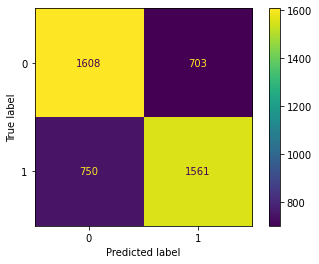

In [58]:
cm = confusion_matrix(y_train, y_pred_train_logreg, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

disp.plot()
plt.show()

### 2. SVC

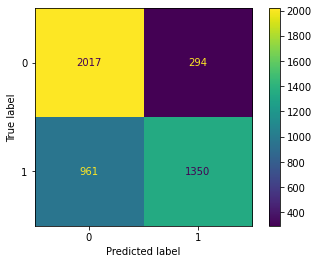

In [59]:
cm = confusion_matrix(y_train, y_pred_train_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

disp.plot()
plt.show()

### 3. Decision Tree

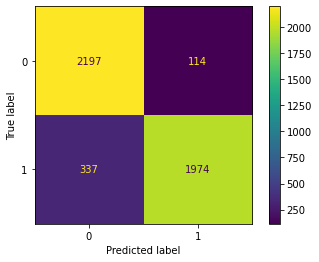

In [60]:
cm = confusion_matrix(y_train, y_pred_train_dt, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()
plt.show()

### 4. Random Forest

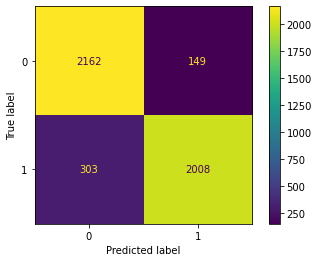

In [61]:
cm = confusion_matrix(y_train, y_pred_train_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

### 5. KNN

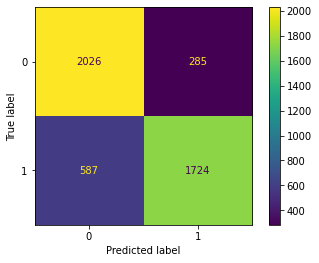

In [62]:
cm = confusion_matrix(y_train, y_pred_train_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()
plt.show()

### 6. Gaussian Naive Bayes

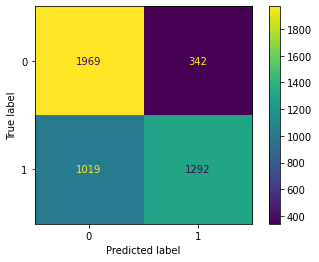

In [63]:
cm = confusion_matrix(y_train, y_pred_train_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot()
plt.show()

### 7. XGBoost

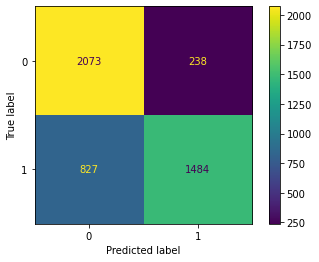

In [64]:
cm = confusion_matrix(y_train, y_pred_train_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

disp.plot()
plt.show()

- dari **confussion matrix evaluation** juga tergambarkan bahwa model terbaik adalah **Decision Tree** dengan nilai recall erorr terkecil data yang salah prediksi
- penentuan model terbaik dengan motede ini dilihat dari nilai model prediksi benar dan salah dan pemilahan datanya.
- kita akan berfokus pada nilai **recall dan precision**, dimana **recall berarti nasabah yang tidak default tetapi diprediksi default artinya kemungkinan bank akan kehilangan nasabah** dan **precision berarti nasabah default diprediksi tidak default artinya bank akan mengalami kerugian.**
- pada kedua kasus ini manakah yang lebih baik ini adalah **keputusan yang sulit** tetapi lebih baik bank kehilangan nasabah dari pada bank akan rugi. yang artinya kita akan memilih nilai recall terkecil dari **confussion matrix evaluation** 


## GridSearch CV

In [65]:
params = {
    'criterion': ['gini', 'entropy'],       # 2
    'max_depth': np.arange(2,9),            # 6
    'min_samples_split': np.arange(2,9)     # 6
}                                           # 2 x 6 x 6 = 24 pasangan kombinasi

In [66]:
from sklearn.model_selection import GridSearchCV
dt= DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, params, cv=10, scoring='recall', return_train_score=True)
dt_grid.fit(X_train_final, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             return_train_score=True, scoring='recall')

In [67]:
print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8}
best score: 0.6113561725630691


- pada grid search cv di tunning beberapa kriteria untuk mendapatkan best score, **menurut penulis rentang kriteria ini masih jauh dari sempurna.** karena hanya memuat sejumlah kecil hyperparameter dari decision tree.
- pemilihan ini dengan pertimbangan **waktu yang singkat** untuk mendapatkannya.
- **best params : criterion:gini, max_depth:8, min_samples_split:7**

In [68]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=8, min_samples_split=8, random_state=1)


In [69]:
dt = DecisionTreeClassifier()
dt.fit(X_train_final,y_train)

DecisionTreeClassifier()

In [70]:
y_pred_train2 = dt_best.predict(X_train_final)
print('roc_auc train: ', roc_auc_score(y_train, y_pred_train2))

y_pred_test2 = dt_best.predict(X_test_final)
print('roc_auc test: ', roc_auc_score(y_test, y_pred_test2))

roc_auc train:  0.7721765469493727
roc_auc test:  0.7523982081712368


- best param predict train test data, didapatkan **model best fit**
- dengan **performa yang masih sangat dapat ditingkatkan**
- apalagi jika dilihat dari nilai default model sebelumnya yang memiliki nilai **roc_auc train 0.97 dan test 0.94.**

# Data Inference

In [71]:
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,0,13429.0,14502.0,15564.0,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0
1,30000.0,1,1,2,35.0,2.0,2.0,2.0,2.0,2,2,14489.0,15460.0,15514.0,14968.0,16026.0,15619.0,1500.0,600.0,0.0,1300.0,0.0,1300.0,0
2,240000.0,1,2,1,36.0,0.0,0.0,0.0,0.0,0,0,239003.0,227962.0,231284.0,239410.0,184094.0,101776.0,9700.0,8500.0,12036.0,8300.0,5000.0,5000.0,0
3,210000.0,2,2,2,35.0,0.0,0.0,0.0,0.0,0,0,147812.0,135624.0,125469.0,103409.0,75498.0,72020.0,5000.0,7000.0,5000.0,4000.0,2447.0,3000.0,0
4,10000.0,1,1,2,25.0,0.0,0.0,0.0,0.0,0,0,5642.0,6652.0,7683.0,9040.0,9222.0,9580.0,1112.0,1143.0,1500.0,324.0,500.0,377.0,0
5,50000.0,2,3,2,22.0,0.0,0.0,0.0,0.0,0,0,36926.0,52845.0,52148.0,32718.0,32096.0,30563.0,20007.0,3014.0,1309.0,5009.0,2008.0,4622.0,0
6,10000.0,1,3,2,21.0,0.0,0.0,2.0,0.0,0,0,4797.0,6457.0,6154.0,6154.0,6280.0,0.0,2400.0,0.0,0.0,126.0,0.0,0.0,0
7,120000.0,2,3,2,50.0,0.0,-1.0,0.0,0.0,0,0,149540.0,118675.0,120047.0,100637.0,79613.0,79286.0,125000.0,4065.0,4000.0,3000.0,3000.0,3000.0,1
8,20000.0,2,2,1,42.0,1.0,2.0,2.0,2.0,0,0,8395.0,8114.0,10293.0,9979.0,10329.0,10391.0,0.0,2479.0,0.0,515.0,377.0,617.0,0
9,140000.0,2,1,2,34.0,-1.0,-1.0,-2.0,-2.0,-1,0,1500.0,0.0,0.0,0.0,6400.0,11400.0,0.0,0.0,0.0,6400.0,5000.0,1000.0,0


In [72]:
data_inf_num = df_inf[num_columns]
data_inf_cat = df_inf[cat_columns]

In [73]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_num_scaled

array([[-1.07502674],
       [-0.99151931],
       [ 0.76213675],
       [ 0.51161445],
       [-1.15853417],
       [-0.82450445],
       [-1.15853417],
       [-0.23995243],
       [-1.07502674],
       [-0.07293757],
       [ 0.76213675],
       [ 0.51161445],
       [-0.23995243],
       [-0.156445  ],
       [-1.07502674],
       [-0.82450445],
       [-0.65748959],
       [ 0.17758473],
       [-0.99151931],
       [ 0.0940773 ]])

In [74]:
# menggabungkan kolom numerikal yang sudah di-scaled dan kolom kategorikal yang sudah di-encoded

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat], axis=1)
data_inf_final

array([[-1.07502674,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.99151931,  2.        ,  2.        ,  2.        ,  2.        ,
         2.        ,  2.        ],
       [ 0.76213675,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.51161445,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.15853417,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.82450445,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.15853417,  0.        ,  0.        ,  2.        ,  0.        ,
         0.        ,  0.        ],
       [-0.23995243,  0.        , -1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-1.07502674,  1.        ,  2.        ,  2.        ,  2.        ,
         0.        ,  0.        ],
       [-0.07293757, -1.    

In [75]:
# melakukan prediksi terhadap data inference dengan model decision tree

y_pred_inf_dt = dt_best.predict(data_inf_final)
y_pred_inf_df_dt = pd.DataFrame(y_pred_inf_dt, columns=['Predict_Default_PaymentNM '])
y_pred_inf_df_dt

,Predict_Default_PaymentNM
0,1
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [76]:
pd.concat([df_inf, y_pred_inf_df_dt], axis=1)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Predict_Default_PaymentNM
0,20000.0,1,2,2,25.0,0.0,0.0,0.0,0.0,0,0,13429.0,14502.0,15564.0,16600.0,17025.0,17381.0,1300.0,1300.0,1300.0,700.0,630.0,650.0,0,1
1,30000.0,1,1,2,35.0,2.0,2.0,2.0,2.0,2,2,14489.0,15460.0,15514.0,14968.0,16026.0,15619.0,1500.0,600.0,0.0,1300.0,0.0,1300.0,0,1
2,240000.0,1,2,1,36.0,0.0,0.0,0.0,0.0,0,0,239003.0,227962.0,231284.0,239410.0,184094.0,101776.0,9700.0,8500.0,12036.0,8300.0,5000.0,5000.0,0,0
3,210000.0,2,2,2,35.0,0.0,0.0,0.0,0.0,0,0,147812.0,135624.0,125469.0,103409.0,75498.0,72020.0,5000.0,7000.0,5000.0,4000.0,2447.0,3000.0,0,0
4,10000.0,1,1,2,25.0,0.0,0.0,0.0,0.0,0,0,5642.0,6652.0,7683.0,9040.0,9222.0,9580.0,1112.0,1143.0,1500.0,324.0,500.0,377.0,0,1
5,50000.0,2,3,2,22.0,0.0,0.0,0.0,0.0,0,0,36926.0,52845.0,52148.0,32718.0,32096.0,30563.0,20007.0,3014.0,1309.0,5009.0,2008.0,4622.0,0,0
6,10000.0,1,3,2,21.0,0.0,0.0,2.0,0.0,0,0,4797.0,6457.0,6154.0,6154.0,6280.0,0.0,2400.0,0.0,0.0,126.0,0.0,0.0,0,1
7,120000.0,2,3,2,50.0,0.0,-1.0,0.0,0.0,0,0,149540.0,118675.0,120047.0,100637.0,79613.0,79286.0,125000.0,4065.0,4000.0,3000.0,3000.0,3000.0,1,0
8,20000.0,2,2,1,42.0,1.0,2.0,2.0,2.0,0,0,8395.0,8114.0,10293.0,9979.0,10329.0,10391.0,0.0,2479.0,0.0,515.0,377.0,617.0,0,1
9,140000.0,2,1,2,34.0,-1.0,-1.0,-2.0,-2.0,-1,0,1500.0,0.0,0.0,0.0,6400.0,11400.0,0.0,0.0,0.0,6400.0,5000.0,1000.0,0,0


- pada prediksi data inference didapan nilai eror 8 dari 20 data, ini mungkin dikarenakan data inference yang dominan target 0.
- dan **best param yang tidak optimal.**

# End Game
didapatkan model terbaik adalah **Decision Tree**, dengan **nilai ROC_AUC 0.97 dan 0.94, Mean Accuracy terbesar dan Standar Deviasi Terkecil. juga Matrix Evalusian eror data terkecil.**
- kemudian best model dilakukan pencarian **hyperparameter terbaik**, tetapi hasil yang didapatkan **tidak cukup baik** dan sangat tidak menggambarkan model defaultnya
- kemudian untuk meninjau lebih jauh lagi dilakukan **predict data inference** dan **hasilnya cukup mengejutkan** yaitu banyak sekali data yang dipredict belum tepat.

- **penulis melakukan preview** dan mendapatkan **improving model pada tahapan selanjutnya.** yaitu **perbaharui kriteria hyperparameter pada best param dan coba lagi hingga hasilnya maksimal.**
- hanya itu satu2nya catatan pada hasil model predict yang kurang optimal ini karena **penulis telah melakukan pengolahan data yang optimal** seperti balancing, tidak handling outlier karena data telah diencode, feature selection dengan korelasi terbaik, tidak ada encoding karena data telah kategorikan, scalling colom yang perlu saja, dan lain sebagainya.

# Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
- Decision tree adalah model prediksi menggunakan struktur pohon, konsep dari pohon keputusan adalah breakdown data. kemudian pada parameter kriterion yang berfungsi sebagai hyperparameter : jika criterion ini diubah2 makan akan didapatkan struktur pohon keputusan yang berbeda2.
terdapat Information_gain : criteria ini menghitung entropi dari semua atribut dan yang memiliki nilai entropi paling sedikit dipilih untuk di pisah.
- **penjelasan point 1 panjang dikarenakan ambigu pada penjelasan criterion atau parameter didalam criterion**
2. Apakah fungsi dari pruning pada Tree model?
- mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk. Hal ini dikarenakan pohon keputusan yang dikontruksi dapat berukuran besar, maka dapat disederhanakan dengan melakukan pemangkasan
3. Bagaimana cara memilih K yang optimal pada KNN?
- jika binari pilihlah k dengan angka ganjil, dan gunakan cross validation untuk membantu memilih k optimal
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
- cross validation adalah metode yang digunakan dengan tujuan untuk memperoleh hasil yang maksimal. metode ini dijalankan dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama.
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
- Accuracy adalah nilai rasio prediski benar (positif/negatif) dengan keseluruhan data, Precision : rasio prediksi benar positif dibandingkan dengan keseluruhan hasil prediksi positif, Recall : rasio prediksi benar positif dibandingkan dengan keseluruhan data yang sebenarnya positif, F1 Score : merupakan perbandingan rata-rata presisi dan recall yang dibobotkan.